# the effect of project titles on campaign success-Kickstarter Data Set

- For the purpose of work, we are interested in building an algorithim that can predict if a campaign will be
successful in receiving full funding. We have a hypothesis that the information in the free text title may allow us to go
beyond the predicitive powers of the other variable columns. This case study is within the feature engineering stage, and a
fully vetted algorithm is not needed for completion

- We will build the algorithms and create 3 features to predict success or fail.

### Look inside the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df=pd.read_excel('Kickstarter_data.xlsx')

In [18]:
df.shape

(110815, 15)

In [4]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [19]:
df.isna().sum()

ID                    0
name                 13
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         816
usd_pledged_real      0
usd_goal_real         0
dtype: int64

In [6]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,2016-01-01,6000,2015-12-07 18:21:00,100.0,failed,2,CA,74.84,70.89,4253.51
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,2016-01-01,2000,2015-12-11 10:52:00,2102.0,successful,48,BE,2314.01,2282.97,2172.19
2,1036288991,The Liaisons: a new twist on the old standards,Jazz,Music,USD,2016-01-01,5000,2015-11-09 20:12:00,5630.0,successful,116,US,5630.00,5630.00,5000.00
3,1045749249,The Many Encounters of Bosley Bear,Children's Books,Publishing,USD,2016-01-01,20000,2015-11-24 02:08:00,101.0,failed,2,US,101.00,101.00,20000.00
4,1048577059,Swift & Co | Innovative Men's Footwear,Footwear,Fashion,GBP,2016-01-01,40000,2015-11-17 12:30:00,2246.0,failed,19,GB,3416.59,3273.48,58298.84


In [7]:
df.groupby('main_category')['currency'].count()

main_category
Art              7587
Comics           3871
Crafts           3385
Dance             817
Design          11888
Fashion          8405
Film & Video    12657
Food             7152
Games           13884
Journalism       1511
Music           10864
Photography      2418
Publishing      11072
Technology      13249
Theater          2055
Name: currency, dtype: int64

In [8]:
import matplotlib.pyplot as plt

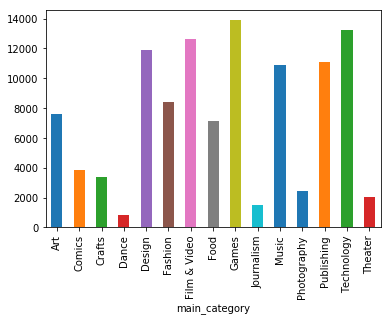

In [9]:
df.groupby('main_category')['currency'].count().plot('bar')

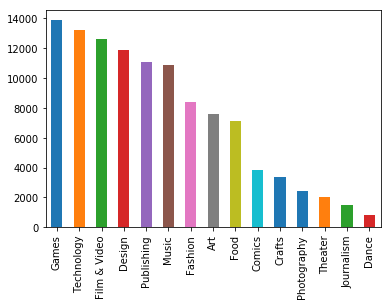

In [10]:
# main category frequency
pd.Series(df['main_category']).value_counts().plot('bar')

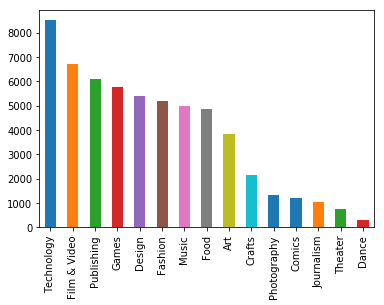

In [11]:
pd.Series(df[df.state=='failed']['main_category']).value_counts().plot('bar')

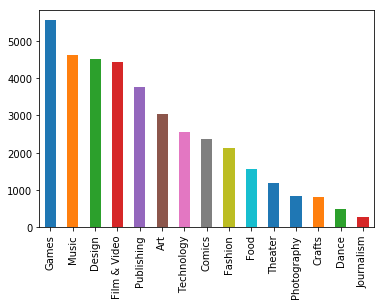

In [12]:
pd.Series(df[df.state=='successful']['main_category']).value_counts().plot('bar')

<Figure size 288x288 with 0 Axes>

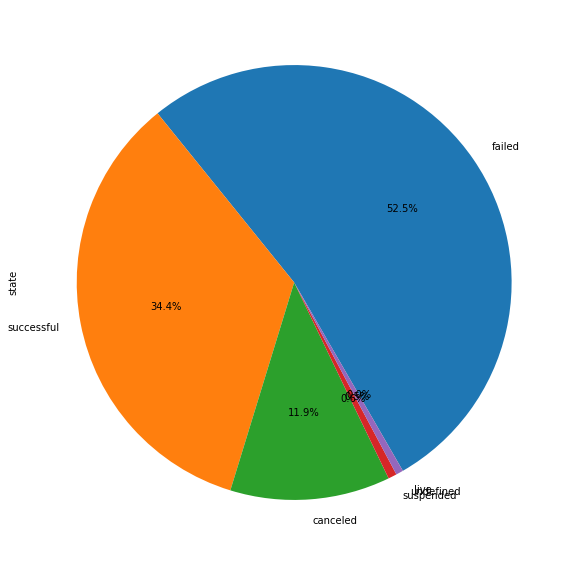

<Figure size 288x288 with 0 Axes>

In [15]:
pd.Series(df['state']).value_counts().plot.pie(figsize=(10, 10), labeldistance=1.1,
autopct='%1.1f%%', startangle=300)
plt.figure(figsize=plt.figaspect(1))

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go

In [17]:
print(df.groupby('state')['currency'].count().index)

Index(['canceled', 'failed', 'live', 'successful', 'suspended', 'undefined'], dtype='object', name='state')


In [18]:
print(df.groupby('state')['currency'].count().values)

[13178 58155     7 38172   707   596]


In [20]:
labels =['canceled', 'failed', 'live', 'successful', 'suspended', 'undefined']
values =[13178, 58155, 7, 38172, 707, 596]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='state')

C:\Users\AKAYA\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [21]:
pd.Series(df[df.state!='successful']['main_category']).value_counts()

Technology      10686
Games            8328
Film & Video     8215
Design           7367
Publishing       7309
Fashion          6266
Music            6230
Food             5599
Art              4546
Crafts           2559
Photography      1579
Comics           1510
Journalism       1237
Theater           875
Dance             337
Name: main_category, dtype: int64

In [22]:
pd.Series(df['main_category']).value_counts()

Games           13884
Technology      13249
Film & Video    12657
Design          11888
Publishing      11072
Music           10864
Fashion          8405
Art              7587
Food             7152
Comics           3871
Crafts           3385
Photography      2418
Theater          2055
Journalism       1511
Dance             817
Name: main_category, dtype: int64

In [23]:
pd.Series(df[df.state=='successful']['main_category']).value_counts()

Games           5556
Music           4634
Design          4521
Film & Video    4442
Publishing      3763
Art             3041
Technology      2563
Comics          2361
Fashion         2139
Food            1553
Theater         1180
Photography      839
Crafts           826
Dance            480
Journalism       274
Name: main_category, dtype: int64

In [25]:
print(df.groupby('state')['currency'].count().index)

Index(['canceled', 'failed', 'live', 'successful', 'suspended', 'undefined'], dtype='object', name='state')


# Create 3 features from the titles.

## 1. misspelling

In [26]:
#!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()

In [27]:
misspell = 0
for name,state in zip(df.name.str.lower()[:], df.state[:]):
    # print(name)
    try:
        if  len(spell.unknown(name.split(" "))) > 0:# and state == "successful":
             misspell += 1
    except:
        pass
print ("# of titles which have misspell: {}".format(misspell))

# of titles which have misspell: 74474


In [28]:
misspell = 0
misspell_successful= 0
misspell_failed= 0
misspell_suspended= 0
misspell_canceled= 0
misspell_undefined= 0
for name,state in zip(df.name.str.lower()[:], df.state[:]):
    # print(name)
    try:
        if  len(spell.unknown(name.split(" "))) > 0:# and state == "successful":
             misspell += 1
        if  len(spell.unknown(name.split(" "))) > 0 and state == "successful":
                   misspell_successful += 1
        if  len(spell.unknown(name.split(" "))) > 0 and state == "failed":
                   misspell_failed += 1
        if  len(spell.unknown(name.split(" "))) > 0 and state == "suspended":
                   misspell_suspended += 1  
        if  len(spell.unknown(name.split(" "))) > 0 and state == "canceled":
                   misspell_canceled += 1
        if  len(spell.unknown(name.split(" "))) > 0 and state == "undefined":
                   misspell_undefined += 1
    except:
        pass
print ("# of titles which have misspell: {}".format(misspell))
print ("misspell apear in state(successful): {}".format(misspell_successful))
print ("misspell apear in state(failed): {}".format(misspell_failed))
print ("misspell apear in state(suspended): {}".format(misspell_suspended))
print ("misspell apear in state(canceled): {}".format(misspell_canceled))
print ("misspell apear in state(undefined): {}".format(misspell_undefined))
misspell_notsuccessful=misspell-misspell_successful
print ("misspell apear in state(not successful): {}".format(misspell_notsuccessful))

# of titles which have misspell: 74474
misspell apear in state(successful): 26689
misspell apear in state(failed): 36738
misspell apear in state(suspended): 553
misspell apear in state(canceled): 10133
misspell apear in state(undefined): 355
misspell apear in state(not successful): 47785


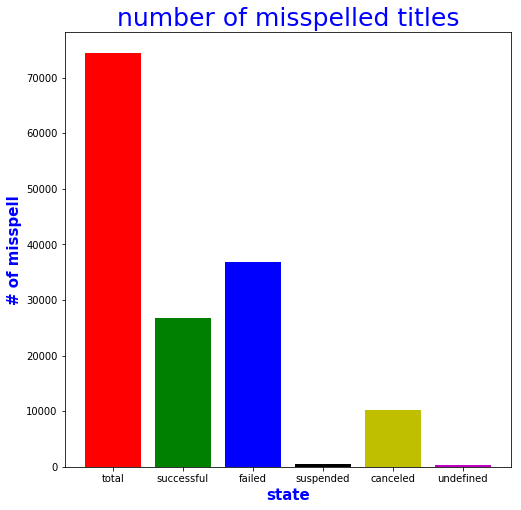

In [29]:
objects = ('total', 'successful', 'failed', 'suspended', 'canceled', 'undefined')
y_pos = np.arange(len(objects))
performance = [misspell, misspell_successful, misspell_failed, misspell_suspended, misspell_canceled, misspell_undefined]
plt.figure(figsize=(8,8))
plt.bar(y_pos, performance, align='center', alpha=1, color = 'rgbkym')
plt.xticks(y_pos, objects)
plt.xlabel('state', fontweight='bold', color = 'b', fontsize=15)
plt.ylabel('# of misspell', fontweight='bold', color = 'b', fontsize=15)
plt.title('number of misspelled titles', color = 'b', fontsize=25)
plt.show()

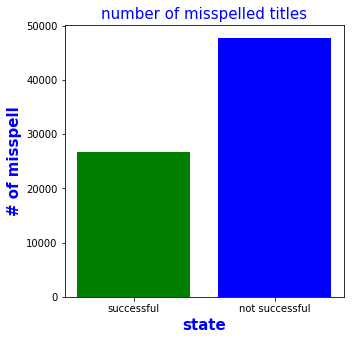

In [30]:
objects = ('successful', 'not successful')
y_pos = np.arange(len(objects))
performance = [misspell_successful, misspell_notsuccessful]
plt.figure(figsize=(5,5))
plt.bar(y_pos, performance, align='center', alpha=1, color = 'gb')
plt.xticks(y_pos, objects)
plt.xlabel('state', fontweight='bold', color = 'b', fontsize=15)
plt.ylabel('# of misspell', fontweight='bold', color = 'b', fontsize=15)
plt.title('number of misspelled titles', color = 'b', fontsize=15)
plt.show()

## 2. positive and negative words in title

- This file and the papers can all be downloaded from 
http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

In [31]:
positive_words = []
negative_words = []
f=open("positive-words.txt", 'r')
positive_words = [line.rstrip() for line in f.readlines()]
f.close()
f=open("negative-words.txt", 'r')
negative_words = [line.rstrip() for line in f.readlines()]
f.close()
count = 0

In [32]:
pos_count = 0
pos_count_successful = 0
for name,state in zip(df.name.str.lower()[:], df.state[:]):
    # print(name)
    try:
        words = name.split(" ")
        for word in words:
            if word in positive_words:# and state == "successful":
                pos_count += 1
            if word in positive_words and state == "successful":
                pos_count_successful += 1
    except:
        pass
print ("# of positive words in title: {}".format(pos_count))
print ("# of positive words apear in state(successful): {}".format(pos_count_successful))
print ("# of positive words apear in state(not successful): {}".format(pos_count-pos_count_successful))

# of positive words in title: 22236
# of positive words apear in state(successful): 7689
# of positive words apear in state(not successful): 14547


In [33]:
count=0
neg_count = 0
neg_count_successful = 0
for name,state in zip(df.name.str.lower()[:], df.state[:]):
    # print(name)
    try:
        words = name.split(" ")
        for word in words:
            if word in negative_words:# and state == "successful":
                neg_count += 1
            if word in negative_words and state == "successful":
                neg_count_successful += 1
    except:
        pass
print ("# of negative words in title: {}".format(neg_count))
print ("# of negative words apear in state(successful): {}".format(neg_count_successful))
print ("# of negative words apear in state(not successful): {}".format(neg_count-neg_count_successful))

# of negative words in title: 13718
# of negative words apear in state(successful): 5514
# of negative words apear in state(not successful): 8204


In [34]:
count1 = 0
count2 = 0
for name,state in zip(df.name.str.lower()[:], df.state[:]):
    # print(name)
    try:
        pos_count = 0
        neg_count = 0
        words = name.split(" ")
        for word in words:
            if word in positive_words:
                pos_count += 1
            if word in negative_words:
                neg_count += 1
        # print(pos_count, neg_count)
        if pos_count > neg_count:#  and state == "successful":
             count1 += 1
        if pos_count > neg_count  and state == "successful":
             count2 += 1
    except:
        pass
print(count1, count2) 

18032 6189


In [87]:
count1 = 0
count2 = 0
for name,state in zip(df.name.str.lower()[:], df.state[:]):
    # print(name)
    try:
        pos_count = 0
        neg_count = 0
        words = name.split(" ")
        for word in words:
            if word in positive_words:
                pos_count += 1
            if word in negative_words:
                neg_count += 1
        # print(pos_count, neg_count)
        if pos_count > neg_count:#  and state == "successful":
             count1 += 1
        if pos_count > neg_count  and state == "failed":
             count2 += 1
    except:
        pass
print(count1, count2) 
print(count1-count2)

18032 9274
8758


In [88]:
count1 = 0
count2 = 0
for name,state in zip(df.name.str.lower()[:], df.state[:]):
    # print(name)
    try:
        pos_count = 0
        neg_count = 0
        words = name.split(" ")
        for word in words:
            if word in positive_words:
                pos_count += 1
            if word in negative_words:
                neg_count += 1
        # print(pos_count, neg_count)
        if pos_count < neg_count:#  and state == "successful":
             count1 += 1
        if pos_count < neg_count  and state == "successful":
             count2 += 1
    except:
        pass
print(count1, count2)
print(count1-count2)

10824 4356
6468


## 3. Title length

In [37]:
count1 = 0
count2 = 0
for name,state in zip(df.name, df.state):
    # print(name)
    try:
        if len(name.split(" ")) <=2: #and state == "successful":
             count1 += 1
        if len(name.split(" ")) <=2 and state == "successful":
             count2 += 1
    except:
        pass
print (count2/count1)

0.23577130248556039


In [38]:
count1 = 0
count2 = 0
for name,state in zip(df.name, df.state):
    # print(name)
    try:
        if len(name.split(" ")) <=3: #and state == "successful":
             count1 += 1
        if len(name.split(" ")) <=3 and state == "successful":
             count2 += 1
    except:
        pass
print (count2/count1)

0.2538996556148288


In [39]:
count1 = 0
count2 = 0
for name,state in zip(df.name, df.state):
    # print(name)
    try:
        if len(name.split(" ")) <=4: #and state == "successful":
             count1 += 1
        if len(name.split(" ")) <=4 and state == "successful":
             count2 += 1
    except:
        pass
print (count2/count1)

0.2741464770463705


In [40]:
count1 = 0
count2 = 0
for name,state in zip(df.name, df.state):
    # print(name)
    try:
        if len(name.split(" ")) <=5: #and state == "successful":
             count1 += 1
        if len(name.split(" ")) <=5 and state == "successful":
             count2 += 1
    except:
        pass
print (count2/count1)

0.2929697989580909


In [41]:
count1 = 0
count2 = 0
for name,state in zip(df.name, df.state):
    # print(name)
    try:
        if len(name.split(" ")) >1 and len(name.split(" ")) <=2: #and state == "successful":
             count1 += 1
        if len(name.split(" ")) >1 and len(name.split(" ")) <=2 and state == "successful":
             count2 += 1
    except:
        pass
print (count2/count1)

0.24252199413489736


In [42]:
count1 = 0
count2 = 0
for name,state in zip(df.name, df.state):
    # print(name)
    try:
        if len(name.split(" ")) >2 and len(name.split(" ")) <=3: #and state == "successful":
             count1 += 1
        if len(name.split(" ")) >2 and len(name.split(" ")) <=3 and state == "successful":
             count2 += 1
    except:
        pass
print (count2/count1)

0.2735590118938701


In [91]:
count1 = 0
count2 = 0
for name,state in zip(df.name, df.state):
    # print(name)
    try:
        if len(name.split(" ")) >6 and len(name.split(" ")) <=13: #and state == "successful":
             count1 += 1
        if len(name.split(" ")) >6 and len(name.split(" ")) <=13 and state == "successful":
             count2 += 1
    except:
        pass
print (count2/count1)

0.4058687150183836


In [69]:
#efect of title length to be the successful (percentage)
count1 = 0
count2 = 0
for name,state in zip(df.name, df.state):
    # print(name)
    try:
        if len(name.split(" ")) ==15: #and state == "successful":
             count1 += 1
        if len(name.split(" ")) ==15 and state == "successful":
             count2 += 1
    except:
        pass
title_length_15=count2/count1


In [57]:
#efect of title length to be the successful (percentage)
title_length = [0 for _ in range(18)]
for i in range (1, 18):
    count1 = 0
    count2 = 0
    for name,state in zip(df.name, df.state):
        # print(name)
        try:
            if len(name.split(" ")) ==i: #and state == "successful":
                 count1 += 1
            if len(name.split(" ")) ==i and state == "successful":
                 count2 += 1
        except:
            pass
    title_length[i] = count2/count1

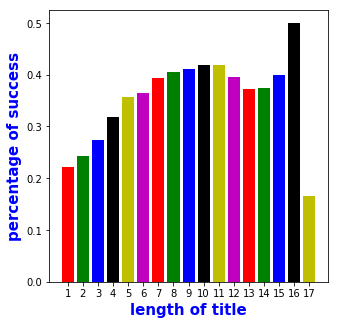

In [58]:
objects = [str(i) for i in range (1, 18)]
y_pos = np.arange(len(objects))
performance = title_length[1:]
plt.figure(figsize=(5,5))
plt.bar(y_pos, performance, align='center', alpha=1, color = 'rgbkym')
plt.xticks(y_pos, objects)
plt.xlabel('length of title', fontweight='bold', color = 'b', fontsize=15)
plt.ylabel('percentage of success', fontweight='bold', color = 'b', fontsize=15)
plt.show()

In [90]:
value=[title_length_1, title_length_2, title_length_3, title_length_4, title_length_5,
title_length_6, title_length_7, title_length_8, title_length_9, title_length_10,
title_length_11, title_length_12, title_length_13]
value

[0.2224367638540259,
 0.24252199413489736,
 0.2735590118938701,
 0.3183830038359398,
 0.3570358691367757,
 0.3652281134401973,
 0.3940870149504452,
 0.4046863988724454,
 0.41191489361702127,
 0.41884297520661157,
 0.41926140477914553,
 0.395,
 0.3722943722943723]

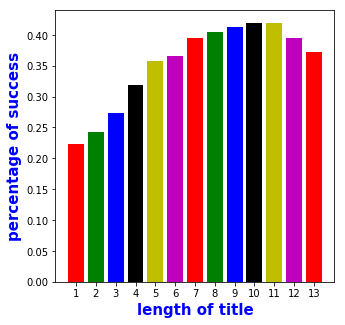

In [86]:
objects = ('1', '2', '3','4','5','6','7','8','9','10','11','12','13')
y_pos = np.arange(len(objects))
performance = value
plt.figure(figsize=(5,5))
plt.bar(y_pos, performance, align='center', alpha=1, color = 'rgbkym')
plt.xticks(y_pos, objects)
plt.xlabel('length of title', fontweight='bold', color = 'b', fontsize=15)
plt.ylabel('percentage of success', fontweight='bold', color = 'b', fontsize=15)
plt.show()

### Create a function for feature engineering

In [24]:
#!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()
def misspell_all(df):
    misspell=0
    for name,state in zip(df.name.str.lower()[:], df.state[:]):
        try:
            if  len(spell.unknown(name.split(" "))) > 0:# and state == "successful":
                misspell += 1
        except:
            pass
    return misspell

In [25]:
misspell_all(df)

74474

In [14]:
df.name

0         Organic Tattoo remains 10 days (Self use & cus...
1         Handcrafted leather wallet | key holder | card...
2           The Liaisons:  a new twist on the old standards
3                        The Many Encounters of Bosley Bear
4                    Swift & Co | Innovative Men's Footwear
5              LEMON LIGHTS Debut Album + busking Tour 2016
6         Help Will Abele Finish His First Full Length A...
7         Dodo Tool. A handy tool that can travel & stay...
8         Breathable x Water Proof hoodie w/10+ Practica...
9                                      Jo's Travel Journals
10                                     Homestead (Canceled)
11                                     100 Days To Get Thru
12                                   Pinpoint Prize STARTUP
13                                  Giving to the community
15                       City Rock: A New Television Series
16                       KreatiiveNative: Aspire to Inspire
17                                      

In [ ]:
print ("# of titles which have misspell: {}".format(misspell))

In [6]:
df=df.dropna()

In [11]:
df.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [72]:
list1=[3,2,4,5,6,7,1]
list1.sort()
list1

[1, 2, 3, 4, 5, 6, 7]

In [74]:
list1=[3,2,4,5,6,7,1]
sorted(list1)

[1, 2, 3, 4, 5, 6, 7]

In [75]:
list1

[3, 2, 4, 5, 6, 7, 1]

In [81]:
df.sort_values(by=['state']).head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
110814,997184429,Tapagotchi - Mobile Virtual Pet RPG,Mobile Games,Games,AUD,2017-12-31,10000,2017-12-01 08:12:00,20.0,canceled,2,AU,15.17,15.68,7841.29
10910,810128684,My Secret Garden (Canceled),Woodworking,Crafts,USD,2016-03-11,1500,2016-02-10 18:21:00,0.0,canceled,0,US,0.00,0.00,1500.00


In [82]:
list1.index(7)

5

In [83]:
list1

[3, 2, 4, 5, 6, 7, 1]

In [84]:
list1.insert(5,2)

In [85]:
list1

[3, 2, 4, 5, 6, 2, 7, 1]

In [86]:
list1.insert(0,'a')

In [87]:
list1

['a', 3, 2, 4, 5, 6, 2, 7, 1]

In [107]:
#self ornek
class car():
    def __init__(self, m):
        self.model = m
    def run(self):
        print("I am running" + ' '+ self.model)

In [108]:
my_car = car("Toyota")
my_car.run()

your_car = car("Sahin")
your_car.run()

I am running Toyota
I am running Sahin


In [121]:
import time
start = time. time()
"the code you want to test stays here"
end = time. time()
print(end - start)

0.0


In [129]:
start = time. time()
def cube_numbers(nums):  
    cube_list =[]
    for i in nums:
        cube_list.append(i**3)
    return cube_list

cubes = cube_numbers([i for i in range (100000000)])

end = time. time()
print(end - start)

45.783753395080566


In [130]:
start = time. time()
def cube_numbers(nums):  
    for i in nums:
        yield(i**3)

cubes = cube_numbers([i for i in range (100000000)])


end = time. time()
print(end - start)

7.299248933792114


In [132]:
thisdict =	{
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}


In [133]:
thisdict['brand']

'Ford'

In [135]:
dictnry={"A": [1,2,3,4,5,6], "B":['a','b', 'c', 'd', 'e', 'f']}

In [136]:
dictnry['A']

[1, 2, 3, 4, 5, 6]

In [138]:
dictnry["A"][0]=15

In [140]:
dictnry["A"]

[15, 2, 3, 4, 5, 6]

In [146]:
for x in thisdict.values():
  print(x)

Ford
Mustang
1964


In [144]:
thisdict.values()

dict_values(['Ford', 'Mustang', 1964])

In [147]:
dictionary={'brand':"Ford", "Model":"Mustang", "year":1964}

In [148]:
for x in dictionary:
    print(x)

brand
Model
year


In [149]:
for x in dictionary:
    print(dictionary[x])

Ford
Mustang
1964


In [150]:
for x in dictionary.values():
    print(x)

Ford
Mustang
1964


In [151]:
for x, y in dictionary.items():
  print(x, y)

brand Ford
Model Mustang
year 1964


In [152]:
print(len(dictionary))

3


In [153]:
dictionary['color']='red'

In [154]:
dictionary

{'brand': 'Ford', 'Model': 'Mustang', 'year': 1964, 'color': 'red'}

In [155]:
dictionary.pop("color")
dictionary

{'brand': 'Ford', 'Model': 'Mustang', 'year': 1964}

In [156]:
dictionary.popitem()
dictionary

{'brand': 'Ford', 'Model': 'Mustang'}

In [158]:
del dictionary['brand']
dictionary

{'Model': 'Mustang'}

In [159]:
data = (

'''object_id, (children_object_id, children_classname), .... 

111, (124, NCString), (132, NSArray), (176, __ProfilePicVC)

121, (126, __NCString)

131, (145, NewsFeedVC), (3452, Malloc)

432, (213, PhotoGaller)''')

In [161]:
data.split("\n")['children_object_id'].max()

['object_id, (children_object_id, children_classname), .... ',
 '',
 '111, (124, NCString), (132, NSArray), (176, __ProfilePicVC)',
 '',
 '121, (126, __NCString)',
 '',
 '131, (145, NewsFeedVC), (3452, Malloc)',
 '',
 '432, (213, PhotoGaller)']

In [174]:
df=data.split("\n")

['object_id, (children_object_id, children_classname), .... ',
 '',
 '111, (124, NCString), (132, NSArray), (176, __ProfilePicVC)',
 '',
 '121, (126, __NCString)',
 '',
 '131, (145, NewsFeedVC), (3452, Malloc)',
 '',
 '432, (213, PhotoGaller)']

In [175]:
import pandas as pd

In [179]:
pd.DataFrame(df)

,0
0,"object_id, (children_object_id, children_class..."
1,
2,"111, (124, NCString), (132, NSArray), (176, __..."
3,
4,"121, (126, __NCString)"
5,
6,"131, (145, NewsFeedVC), (3452, Malloc)"
7,
8,"432, (213, PhotoGaller)"
